######################################
## Author: Prasad Pooja
## Date: 21 Sep 2018 
## Title: BUAN 6340.001 - Programming for Data Science - F18 Assignment 2
## Purpose:  Use baseball dataset batting.csv to answer below questions
######################################

1. Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [514]:
# Import libraries
import numpy as np
import pandas as pd
#np.__version__
import matplotlib as plt

In [515]:
df_batting = pd.read_csv(r"C:\Users\pooja\Dropbox\1_Pooja_Prasad\02UTD_Aug2018\03_BUAN6340_ProgrammingFor DataScience\Assignment\Assignment_2\batting.csv", header = 0)

In [516]:
df_batting['PA'] = df_batting[['AB','BB','HBP','SF','SH']].sum(axis = 1)
df_batting['OBP'] = df_batting[['H','BB','HBP']].sum(axis = 1)/df_batting[['AB','BB','HBP','SF']].sum(axis = 1)
df_batting['AVG'] = df_batting['H']/df_batting['AB'] #Batting Average :Hits divided by At Bats
df_batting['AGE'] = df_batting['yearID'] - df_batting['birthYear'] 

In [517]:
df_batting.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,AVG,AGE
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,NaN,NaN,NaN,NaN,NaN,4.0,0.000000,0.000000,21
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,0.0,NaN,NaN,NaN,NaN,NaN,122.0,0.295082,0.271186,29
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,5.0,NaN,NaN,NaN,NaN,NaN,139.0,0.302158,0.291971,22
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,2.0,NaN,NaN,NaN,NaN,NaN,133.0,0.330827,0.330827,25
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,1.0,NaN,NaN,NaN,NaN,NaN,122.0,0.336066,0.325000,19


In [411]:
df_batting.tail()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,AVG,AGE
102811,zimmejo02,Jordan,Zimmermann,1986,2016,1,DET,AL,19,4,...,2.0,0.0,0.0,1.0,0.0,0.0,5.0,0.250000,0.250000,30
102812,zimmery01,Ryan,Zimmerman,1984,2016,1,WAS,NL,115,427,...,104.0,1.0,5.0,0.0,6.0,12.0,467.0,0.271949,0.217799,32
102813,zobribe01,Ben,Zobrist,1981,2016,1,CHN,NL,147,523,...,82.0,6.0,4.0,4.0,4.0,17.0,631.0,0.385965,0.271511,35
102814,zuninmi01,Mike,Zunino,1991,2016,1,SEA,AL,55,164,...,65.0,0.0,6.0,0.0,1.0,0.0,192.0,0.317708,0.207317,25
102815,zychto01,Tony,Zych,1990,2016,1,SEA,AL,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,26


2) Print out the dimensions and info about the dataframe you just created

In [412]:
df_batting.shape #dataframe has 102816 observations and 25 features

(102816, 29)

In [413]:
len(df_batting) # number of rows

102816

In [414]:
df_batting.size # total number of elements i.e. product of rows and cols

2981664

In [415]:
df_batting.ndim #number of dimensions of dataframe df_batting

2

In [416]:
df_batting.info() #number of non-missing values and data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 29 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [417]:
#range(df_batting) range(0, len(df.index))
#df_batting.range
range(0, len(df_batting.index))

range(0, 102816)

3) How many players have hit 40 or more HRs in one single season? (Number only)

In [418]:
sumHR_season= df_batting.groupby(['yearID','playerID']).sum()
sumHR_season=sumHR_season[sumHR_season['HR']>=40]
len(sumHR_season.reset_index('playerID')['playerID'].unique())

142

4) How many players have hit 600 or more HRs for their career?
(Dataframe with name and player first and last name only and amount of HRs)

In [419]:
sumHR_perPlayer = df_batting.groupby(['playerID','nameFirst','nameLast'])['HR'].sum()
sumHR_perPlayer = sumHR_perPlayer.reset_index()
for index,record in sumHR_perPlayer.iterrows():
    if record['HR']>=600:
        print(record['nameFirst'],record['nameLast'],record['HR'])

Hank Aaron 755
Barry Bonds 762
Ken Griffey 630
Willie Mays 660
Alex Rodriguez 696
Babe Ruth 714
Sammy Sosa 609
Jim Thome 612


5) How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)count=0


In [420]:
sum_season = df_batting.groupby(['yearID','playerID']).sum()
sum_season = sum_season[(sum_season['2B']>=40) & (sum_season['3B']>=10) & (sum_season['H']>=200) & (sum_season['HR']>=30)]
len(sum_season.reset_index('playerID')['playerID'].unique())
#df_new = df.groupby(['col1', 'col2'])["col3", "col4"].sum()
#df[(df['W']>0) & (df['Y'] > 1)]

11

6) How many players seasons have had 100 or more SBs?
(Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )

In [421]:
players_seasons = df_batting.groupby(['yearID','playerID','nameFirst','nameLast'])['SB'].sum()
players_seasons = players_seasons.reset_index()
players_seasons = players_seasons.sort_values('SB',ascending=False)
for index, record in players_seasons.iterrows():
    if record['SB']>=100:
       print(record['nameFirst'],record['nameLast'],record['yearID'],record['SB'])

Hugh Nicol 1887 138.0
Rickey Henderson 1982 130.0
Arlie Latham 1887 129.0
Lou Brock 1974 118.0
Charlie Comiskey 1887 117.0
Billy Hamilton 1891 111.0
John Ward 1887 111.0
Billy Hamilton 1889 111.0
Vince Coleman 1985 110.0
Arlie Latham 1888 109.0
Vince Coleman 1987 109.0
Rickey Henderson 1983 108.0
Vince Coleman 1986 107.0
Tom Brown 1891 106.0
Maury Wills 1962 104.0
Hugh Nicol 1888 103.0
Pete Browning 1887 103.0
Jim Fogarty 1887 102.0
Billy Hamilton 1890 102.0
Rickey Henderson 1980 100.0


7) How many players in the 1960s (yearID) have hit 200 or more HRs? 
(Dataframe, first name, last name, number of HRs, ordered descending by HR amt)

In [251]:
players_1960 = df_batting.loc[(df_batting['yearID']>=1960) & (df_batting['yearID']<1970)]
players_1960 = players_1960.groupby(['playerID','nameFirst','nameLast'])['HR'].sum()
players_1960 = players_1960.reset_index()
players_1960 = players_1960[players_1960['HR']>=200]
players_1960 = players_1960.sort_values('HR',ascending=False)
players_1960=players_1960.drop(['playerID'],axis=1)
players_1960
#players_1960=df_batting.loc[(df_batting["yearID"] == 1960) & (df_batting["teamID"] == 'ML1')]
#players_1960

,nameFirst,nameLast,HR
856,Harmon,Killebrew,393
0,Hank,Aaron,375
1044,Willie,Mays,350
1372,Frank,Robinson,316
1057,Willie,McCovey,300
751,Frank,Howard,288
279,Norm,Cash,278
70,Ernie,Banks,269
1009,Mickey,Mantle,256
283,Orlando,Cepeda,254


8) Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)

In [422]:
sumHR_perPlayer = df_batting.groupby(['playerID','nameFirst','nameLast'])['HR'].sum()
sumHR_perPlayer = sumHR_perPlayer.reset_index()
for index,record in sumHR_perPlayer.iterrows():
    if record['HR']==sumHR_perPlayer['HR'].max():
        print(record['nameFirst'],record['nameLast'],record['HR'])

Barry Bonds 762


9) Who had the most hits (H) in the 1970s? (Dataframe)

In [423]:
players_1970 = df_batting[(df_batting['yearID']>=1970) & (df_batting['yearID']<1980)]
players_1970 = players_1970.groupby(['playerID','nameFirst','nameLast'])['H'].sum()
players_1970 = players_1970.reset_index()
for index, record in players_1970.iterrows():
    if record['H']==players_1970['H'].max():
        print(record['nameFirst'],record['nameLast'],record['H'])

Pete Rose 2045


10) Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  
    (Dataframe, first name, last name, OBP, ordered descending by OBP)

In [424]:
players_1977 = df_batting[df_batting['yearID']==1977]
players_1977 = players_1977.groupby(['nameFirst','nameLast','playerID'],  as_index= False)['PA','OBP'].sum()
players_1977 = players_1977[players_1977['PA']>=500]
players_1977=players_1977.sort_values('OBP',ascending=False)
players_1977 = players_1977.head(5)
players_1977 =players_1977[['nameFirst','nameLast','OBP']]
players_1977
#df1 = df[['a','b']]

,nameFirst,nameLast,OBP
249,Doug,Rader,0.715277
100,Bruce,Bochte,0.700293
892,Willie,Horton,0.587434
137,Chris,Speier,0.497602
735,Rod,Carew,0.448773


11) Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)

In [425]:
players_2013 = df_batting[(df_batting['yearID']==2013)]
players_2013 = players_2013.groupby(['nameFirst','nameLast'],  as_index= False)['PA','AVG'].sum()
players_2013= players_2013[players_2013['PA']>=300].sort_values('AVG', ascending =False).head(8)
#df[(df['W']>0) & (df['Y'] > 1)]
players_2013 = players_2013[['nameFirst','nameLast','AVG']]
players_2013

,nameFirst,nameLast,AVG
871,Marlon,Byrd,0.602463
714,Jose,Iglesias,0.589492
927,Michael,Young,0.589367
44,Alex,Rios,0.556314
665,John,Buck,0.548007
803,Kurt,Suzuki,0.525253
31,Alberto,Callaspo,0.522141
371,Delmon,Young,0.519094


12) Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits) Top 5

In [426]:
leaders_1940s = df_batting[(df_batting['yearID']>=1940) & (df_batting['yearID']<1950)]
leaders_1940s = leaders_1940s.groupby(['playerID','nameFirst','nameLast'])['H'].sum()
leaders_1940s = leaders_1940s.reset_index()
leaders_1940s = leaders_1940s.sort_values('H', ascending = False).head()
leaders_1940s = leaders_1940s[['nameFirst','nameLast','H']]
leaders_1940s

,nameFirst,nameLast,H
138,Lou,Boudreau,1578
427,Bob,Elliott,1563
1576,Dixie,Walker,1512
1103,Stan,Musial,1432
390,Bobby,Doerr,1407


13) Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)

In [427]:
df_batting_H = df_batting.groupby(['yearID','playerID','nameFirst','nameLast'])['H'].sum().reset_index()
df_most_hits_initial=pd.DataFrame()
for i in range(df_batting['yearID'].min(),df_batting['yearID'].max()):
    df_ByYear=df_batting_H[(df_Q13.yearID==i)]
    df_most_hits_initial = df_most_hits_initial.append(df_ByYear[df_ByYear.H == max(df_ByYear.H)].reset_index()[['yearID','playerID','nameFirst','nameLast','H']])

df_most_hits_initial.sort_values(by='yearID',ascending=True).drop_duplicates()
df_most_hits = df_most_hits_initial.groupby(['playerID','nameFirst','nameLast'],as_index = False).count()[['nameFirst','nameLast','H']]
df_most_hits.columns = ['nameFirst','nameLast','Number of hits']
df_most_hits[df_most_hits['Number of hits']==max(df_most_hits['Number of hits'])]


,nameFirst,nameLast,Number of hits
22,Ty,Cobb,7
75,Pete,Rose,7
85,Ichiro,Suzuki,7


14) Which players have played the most games for their careers? 
Top 5 first name, last name, descending by games played presented as a dataframe

In [428]:
players_games = df_batting.groupby(['nameFirst','nameLast','playerID'])['G'].sum()
players_games = players_games.reset_index().sort_values('G', ascending = False).head(5)
players_games = players_games[['nameFirst','nameLast','G']]
players_games


,nameFirst,nameLast,G
14870,Pete,Rose,3562
2995,Carl,Yastrzemski,3308
7962,Hank,Aaron,3298
15705,Rickey,Henderson,3081
18179,Ty,Cobb,3035


15) How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs? 
Just a number is okay here

In [429]:
players_hits_hr =  df_batting.groupby('playerID')['H','HR'].sum()
players_hits_hr = players_hits_hr.reset_index()
players_hits_hr = players_hits_hr[(players_hits_hr['H']>=3000) & (players_hits_hr['HR'] >= 500)]
len(players_hits_hr)

5

16) How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [430]:
HR_1988 = df_batting[df_batting['yearID']==1988]
HR_1988['HR'].sum()

3180

17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs. 
Dataframe, first name, last name, average, descending by average

In [431]:
AvgSeason_WadeBoggs = df_batting[(df_batting['nameFirst']=='Wade') & (df_batting['nameLast']=='Boggs')]
AvgSeason_WadeBoggs = AvgSeason_WadeBoggs.groupby(['nameFirst','nameLast','yearID'])['AVG','AB'].sum()
AvgSeason_WadeBoggs = AvgSeason_WadeBoggs.reset_index()
AvgSeason_WadeBoggs = AvgSeason_WadeBoggs[AvgSeason_WadeBoggs['AB']>=500].sort_values('AVG', ascending = False).head(3)
AvgSeason_WadeBoggs = AvgSeason_WadeBoggs[['nameFirst','nameLast','AVG']]
AvgSeason_WadeBoggs
                                                    

,nameFirst,nameLast,AVG
3,Wade,Boggs,0.367534
6,Wade,Boggs,0.366438
5,Wade,Boggs,0.362976


18) Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.
Dataframe with first name, last name, OBP

In [432]:
OBP_1995 = df_batting[df_batting['yearID']==1995]
OBP_1995 = OBP_1995.groupby(['nameFirst','nameLast','playerID'])['PA','OBP'].sum()
OBP_1995 = OBP_1995.reset_index()
OBP_1995 = OBP_1995[OBP_1995['PA']>=400].sort_values('OBP',ascending=False).head(10)
OBP_1995 = OBP_1995[['nameFirst','nameLast','OBP']]
OBP_1995


,nameFirst,nameLast,OBP
85,Bobby,Bonilla,0.776250
260,David,Segui,0.775527
103,Brett,Butler,0.748884
646,Luis,Gonzalez,0.706253
1109,Vince,Coleman,0.683086
1067,Todd,Zeile,0.649406
934,Ruben,Sierra,0.645338
907,Roberto,Kelly,0.642286
731,Mike,Devereaux,0.632502
224,Darren,Lewis,0.627479


19)Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928? 
I would like a dataframe with first name, last name, number of 3Bs- 1 person (if tie- 2 people)

In [453]:
ThreeBs_4years = df_batting[df_batting['yearID'].isin([1922,1925,1926,1928])]
ThreeBs_4years = ThreeBs_4years.groupby(['nameFirst','nameLast'], as_index =False )['3B'].sum()
ThreeBs_4years = ThreeBs_4years.sort_values('3B' , ascending = False)
max_years=ThreeBs_4years['3B'].max()
#ThreeBs_4years = ThreeBs_4years.reset_index().sort_values('3B', ascending = False).drop_duplicates(['yearID'])
#ThreeBs_4years = ThreeBs_4years.reset_index().sort_values('3B', ascending = False)
ThreeBs_4years[ThreeBs_4years['3B']==max_years]
#leader_MLB = leader_MLB.reset_index().sort_values('H',ascending = False ).drop_duplicates(['yearID'])

,nameFirst,nameLast,3B
237,Curt,Walker,59


20) How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?
A number is okay here

In [272]:
no_players_hr_sb = df_batting.groupby(['playerID','yearID'])['HR','SB'].sum()
no_players_hr_sb = no_players_hr_sb.reset_index()
no_players_hr_sb = no_players_hr_sb[(no_players_hr_sb['HR']>=30) & (no_players_hr_sb['SB']>=30)]
no_players_hr_sb = no_players_hr_sb['playerID'].unique()
len(no_players_hr_sb)

38

21) Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)

In [442]:
highestOBP_1986 = df_batting[df_batting['yearID']==1986]
highestOBP_1986 = highestOBP_1986.groupby(['nameFirst','nameLast','playerID'], as_index = False)['AB','OBP'].sum()
highestOBP_1986=highestOBP_1986[highestOBP_1986['AB']>=400].sort_values('OBP', ascending = False).head(1)
highestOBP_1986 = highestOBP_1986[['nameFirst','nameLast','OBP']]
highestOBP_1986
#print(highestOBP_1986['nameFirst'],highestOBP_1986['nameLast'],highestOBP_1986['AB'])

,nameFirst,nameLast,OBP
98,Bobby,Bonilla,0.702937


22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)

In [443]:
highestOBP_1997_NL = df_batting[(df_batting['yearID']==1997) & (df_batting['lgID']=='NL')]
highestOBP_1997_NL = highestOBP_1997_NL.groupby(['nameFirst','nameLast','playerID'], as_index = False)['AB','OBP'].sum()
highestOBP_1997_NL = highestOBP_1997_NL[highestOBP_1997_NL['AB']>=400].sort_values('OBP', ascending = False).head(1)
highestOBP_1997_NL = highestOBP_1997_NL[['nameFirst','nameLast','OBP']]
highestOBP_1997_NL

,nameFirst,nameLast,OBP
313,Lance,Johnson,0.726551


23) Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)-500 or more bats at bats – avg HR for those player
Filter out everyone <500 bats to take avg


In [575]:
playerHR_2012 = df_batting[df_batting['yearID']==2012]
playerHR_2012 = playerHR_2012.groupby(['nameFirst', 'nameLast','yearID','playerID'], as_index= False)['AB','HR'].sum()
playerHR_2012 = playerHR_2012[playerHR_2012['AB']>=500]
mean_HR = playerHR_2012['HR'].mean()
playerHR_2012 = playerHR_2012[playerHR_2012['HR'] > mean_HR].sort_values(by= ['HR', 'AB'], ascending = [False, False])
playerHR_2012[['nameFirst', 'nameLast', 'HR', 'AB']].reset_index()

,index,nameFirst,nameLast,HR,AB
0,926,Miguel,Cabrera,44,622
1,312,Curtis,Granderson,43,596
2,725,Josh,Hamilton,43,562
3,414,Edwin,Encarnacion,42,542
4,1075,Ryan,Braun,41,598
5,13,Adam,Dunn,41,539
6,28,Adrian,Beltre,36,604
7,742,Josh,Willingham,35,519
8,593,Jay,Bruce,34,560
9,1059,Robinson,Cano,33,627


24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)

In [576]:
young_50HR =  df_batting.groupby(['nameFirst','nameLast','playerID','AGE','yearID'],as_index= False)['HR'].sum()
young_50HR = young_50HR[young_50HR['HR']>=50].sort_values('AGE')
young_50HR=young_50HR[['nameFirst','nameLast','HR','yearID']]
young_50HR.head(1)

,nameFirst,nameLast,HR,yearID
74865,Prince,Fielder,50,2007


25) Who are the five youngest players to hit 300 or more HRs for their career?(Dataframe, first name, last name, season they eclipsed more than 300 HRs)

In [577]:
young_300HR = df_batting.groupby(['nameFirst','nameLast','playerID','AGE','yearID'],as_index= False)['HR'].sum()
young_300HR['Cum_Sum']=young_300HR.groupby(['nameFirst','nameLast'])['HR'].cumsum()
young_300HR=young_300HR.sort_values(['nameFirst','nameLast','Cum_Sum'],ascending=False)
young_300HR_new=young_300HR[young_300HR['Cum_Sum']>300]
young_300HR_new=young_300HR_new.groupby(['nameFirst','nameLast']).min()['Cum_Sum'].reset_index()
young_300HR_new = young_300HR_new.merge(young_300HR, on=['nameFirst','nameLast','Cum_Sum'])
young_300HR_new=young_300HR_new.sort_values('AGE').head(5)
young_300HR_new.drop(['HR','playerID'],axis=1)



,nameFirst,nameLast,Cum_Sum,AGE,yearID
50,Frank,Thomas,325,23,1991
89,Ken,Griffey,324,25,1994
16,Bob,Johnson,307,26,1962
100,Mel,Ott,306,28,1937
78,Jimmie,Foxx,302,28,1935


BONUS:  Graph total HRs per season using bar graph

<module 'matplotlib' from 'C:\\Users\\pooja\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

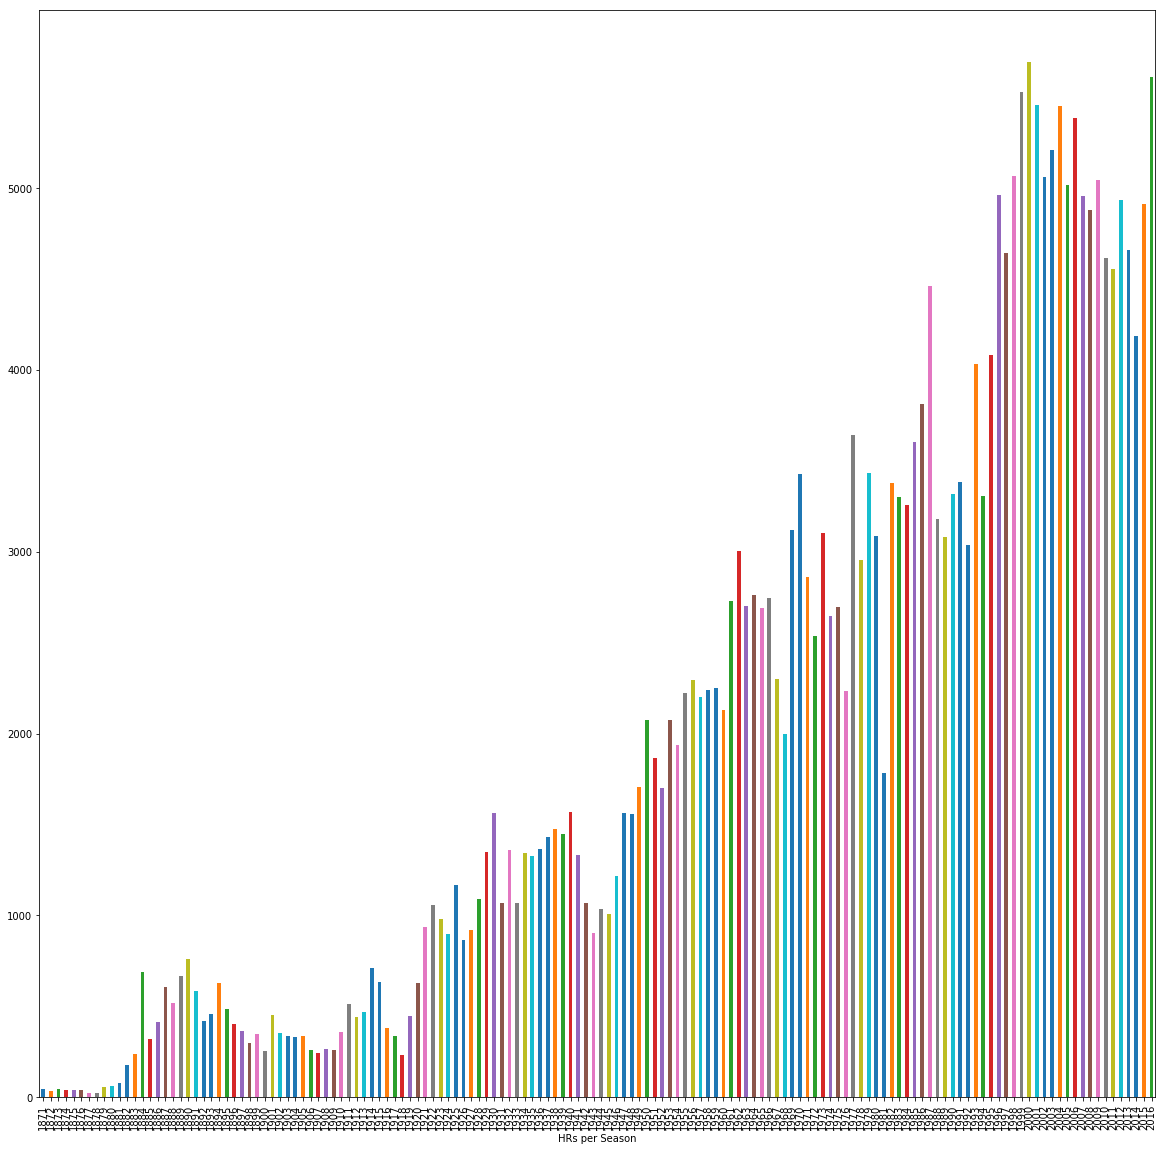

In [376]:
df_bonus = df_batting.groupby('yearID')['HR'].sum()
df_bonus.plot.bar(figsize = [20,20])
plt.pyplot.xlabel('Seasons')
plt.pyplot.xlabel('HRs per Season')
plt

Using a line graph please graph the average HRs per AB (think about this) per season

<module 'matplotlib' from 'C:\\Users\\pooja\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

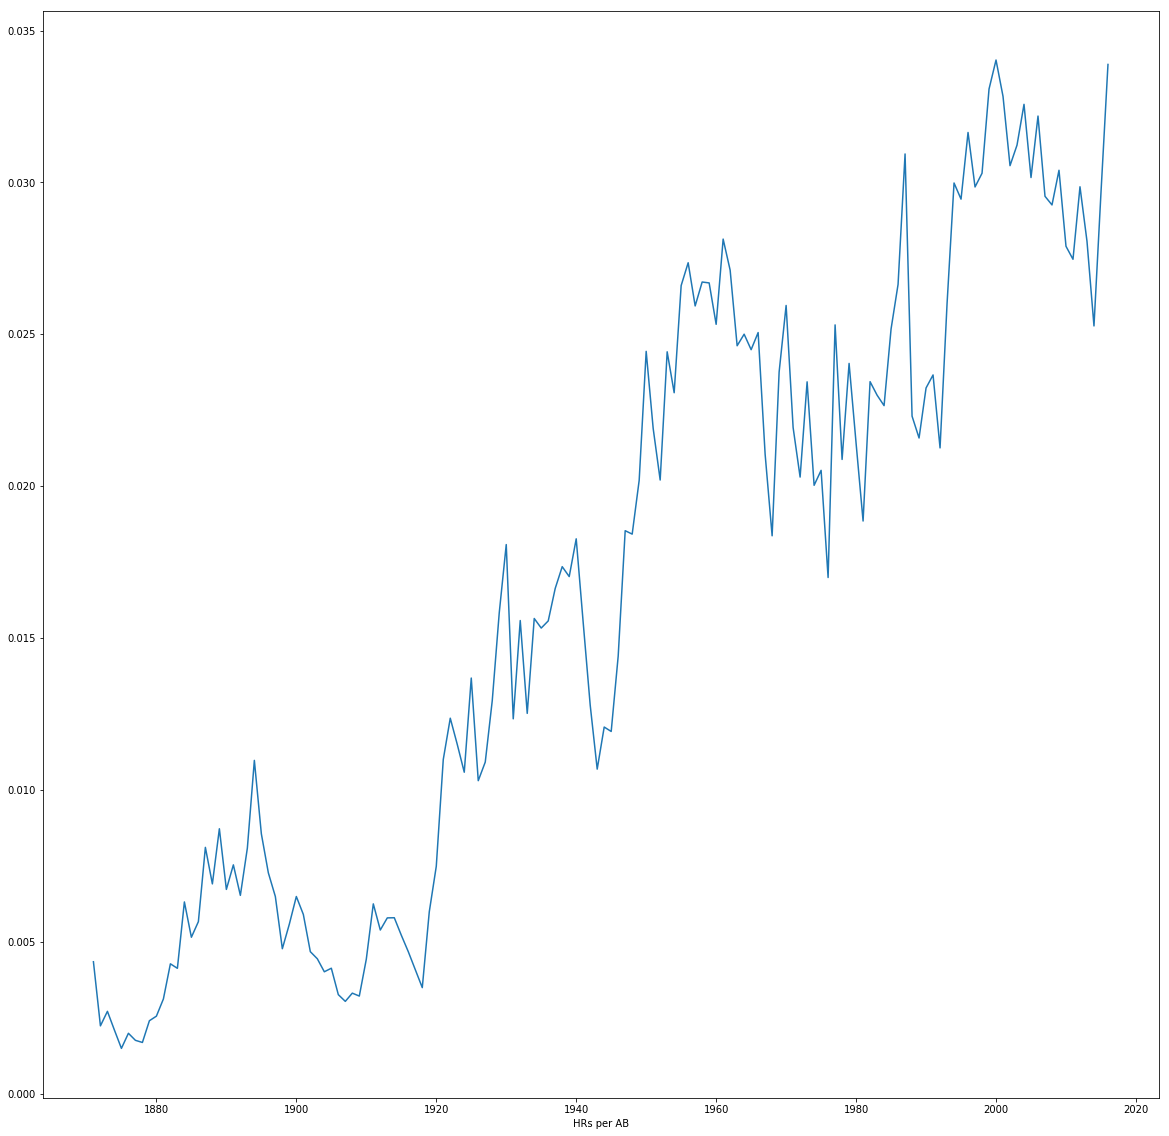

In [383]:
df_bonus_2 = df_batting.groupby('yearID')['HR','AB'].mean()
df_bonus_2['HRperAB']=df_bonus_2['HR']/df_bonus_2['AB']
df_bonus_2['HRperAB'].plot.line(figsize = [20,20])
plt.pyplot.xlabel('Seasons')
plt.pyplot.xlabel('HRs per AB')
plt
